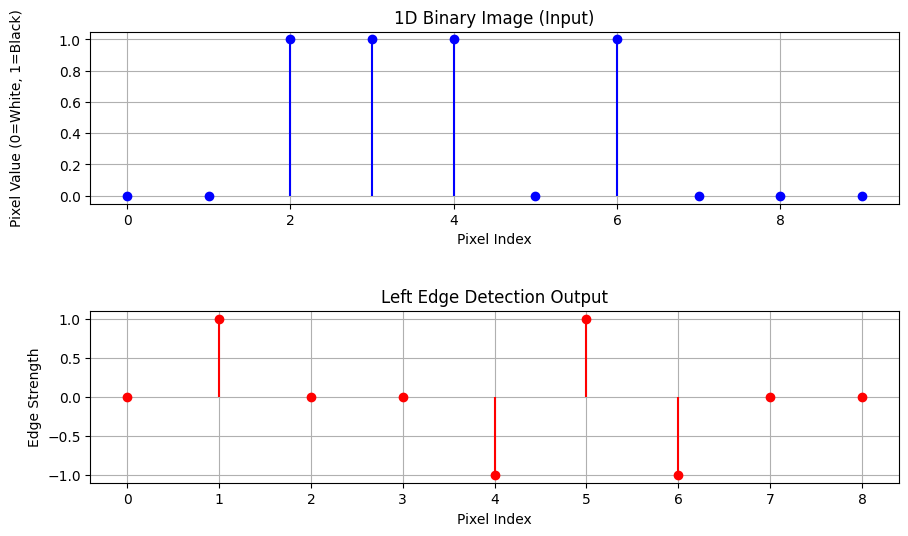

In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Define the 1D input sequence (binary image representation)
X = np.array([0, 0, 1, 1, 1, 0, 1, 0, 0, 0], dtype=np.float32)

# Define the Left Edge Detection filter [-1, 1]
W = np.array([-1, 1], dtype=np.float32).reshape(2, 1, 1)  # (filter_size, input_channels, output_channels)

# Reshape input for TensorFlow Conv1D (batch_size=1, length, channels=1)
X_tensor = X.reshape(1, -1, 1)

# Create the 1D convolutional layer
conv_layer = tf.keras.layers.Conv1D(filters=1, kernel_size=2, strides=1, use_bias=False, padding="valid")

# Set the custom filter weights
conv_layer.build(input_shape=(1, len(X), 1))
conv_layer.set_weights([W])

# Apply convolution
Y = conv_layer(X_tensor).numpy().flatten()

# Adjust figure size
plt.figure(figsize=(10, 6))

# Input Signal Plot
plt.subplot(2, 1, 1)
plt.stem(X, linefmt="b-", markerfmt="bo", basefmt=" ")
plt.title("1D Binary Image (Input)")
plt.xlabel("Pixel Index")
plt.ylabel("Pixel Value (0=White, 1=Black)", labelpad=25)
plt.grid()

# Edge Detection Output Plot
plt.subplot(2, 1, 2)
plt.stem(Y, linefmt="r-", markerfmt="ro", basefmt=" ")
plt.title("Left Edge Detection Output")
plt.xlabel("Pixel Index")
plt.ylabel("Edge Strength")
plt.grid()

plt.tight_layout(pad=3.0)
plt.subplots_adjust(left=0.15)

plt.show()
